# Thermal Vacuum Chamber

Create a TVC Plot for the paper

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import raadpy as rp
from scipy.signal import savgol_filter

%matplotlib widget

Warning! Cupy not found! GPU accelleration is not available



In [2]:
# Import the data
time_raw = pd.read_csv('./20190804TVTt.txt').to_numpy().T[0]
date_raw = pd.read_csv('./20190804TVTd.txt').to_numpy().T[0]
dati_raw = date_raw + ' ' + time_raw
temp_raw = pd.read_csv('./20190804TVTtemp.txt').to_numpy().T[0]
pres_raw = pd.read_csv('./20190804TVTp.txt').to_numpy().T[0]

In [3]:
# Convert the datetime to seconds
time = np.array([rp.Time.strptime(d,'%m/%d/%Y %I:%M:%S %p').to_value('unix') for d in dati_raw])
time -= min(time)
time /= 60*60

# Convert the temperature
temp = temp_raw/10

# Convert the pressure
pres = pres_raw

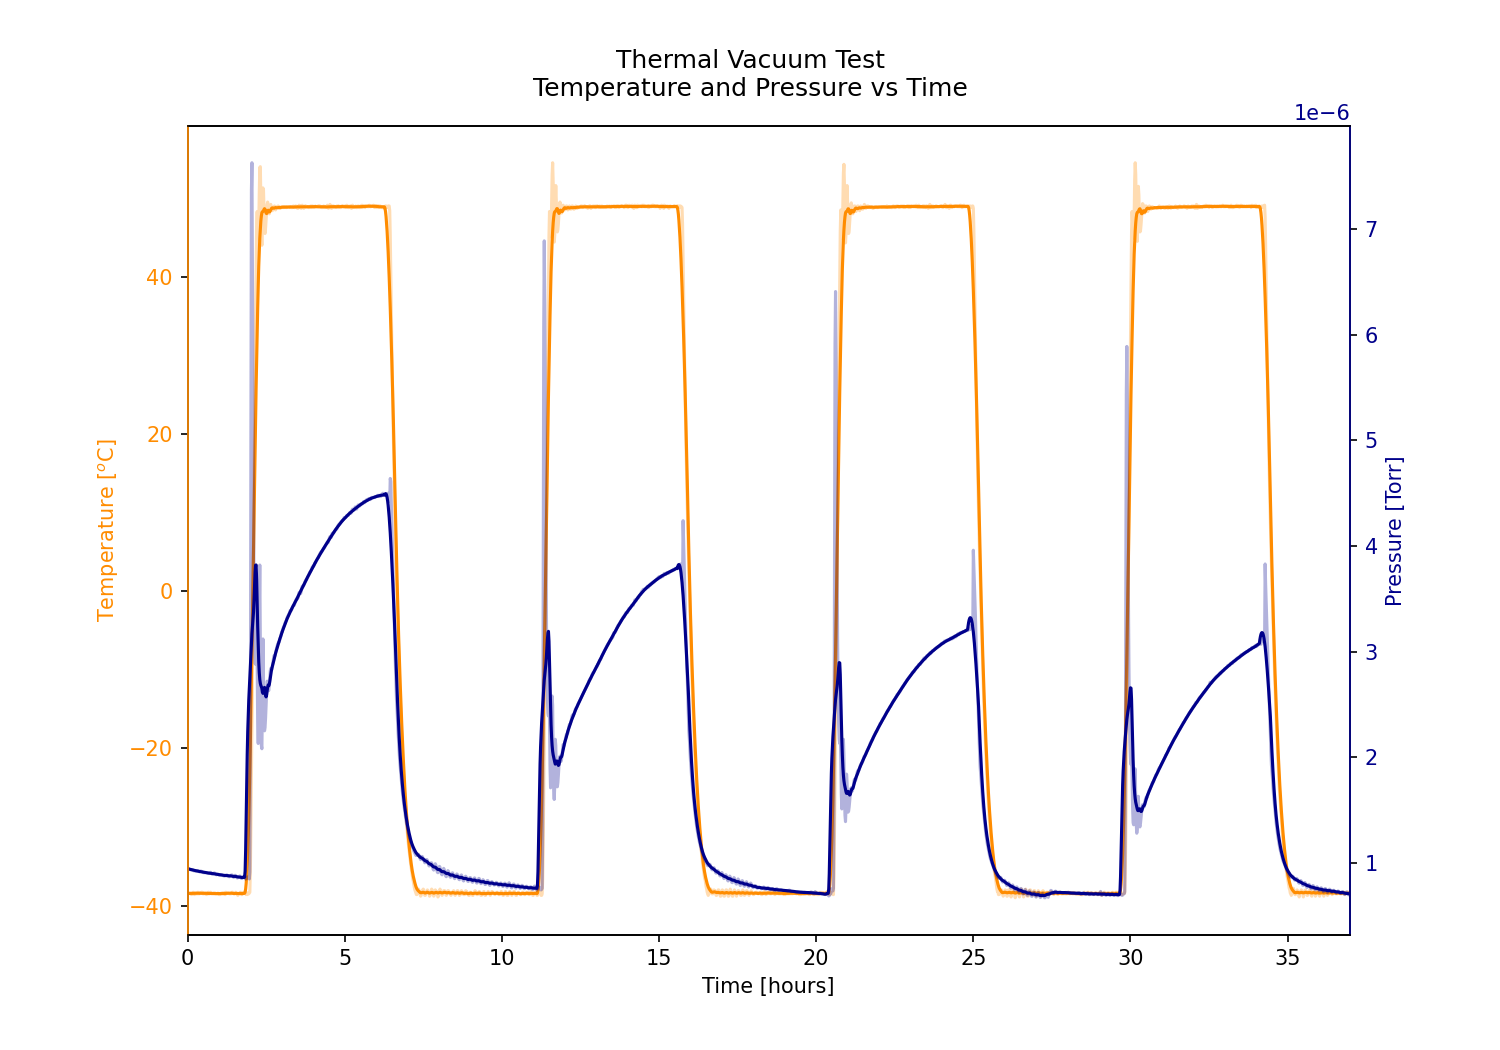

In [25]:
# Create the figure
fig     = plt.figure(figsize=(10,7),dpi=150)
ax0     = fig.add_subplot(111)
ax1     = ax0.twinx()
color   = ['darkorange','darkblue']

# Get the relevant data
idx = np.where((13 <= time) & (time <= 50))[0]
new_time = time - time[idx[0]]

# Plot the temperature
ax0.plot(new_time[idx], temp[idx],c=color[0],alpha=0.3)
ax0.plot(new_time[idx], savgol_filter(temp[idx],21,1),c=color[0])

# Plot pressure
ax1.plot(new_time[idx], pres[idx],c=color[1],alpha=0.3)
ax1.plot(new_time[idx], savgol_filter(pres[idx],21,1),c=color[1])

# Prettify
ax0.set_xlim(0,max(new_time[idx]))
ax1.spines['left'].set_color(color[0])
ax1.spines['right'].set_color(color[1])
ax1.tick_params(axis ='y', labelcolor = color[1])
ax0.tick_params(axis ='y', labelcolor = color[0])
ax0.set_ylabel(r'Temperature [$^o$C]', color = color[0])
ax1.set_ylabel('Pressure [Torr]', color = color[1])
ax0.set_xlabel('Time [hours]')
fig.suptitle('\nThermal Vacuum Test\nTemperature and Pressure vs Time');